In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy.interpolate import interp2d

In [30]:
cpu_times = pd.read_csv('NI_simulation_computation_times.csv')
num_sources = cpu_times.num_sources.to_numpy()
avg_time = cpu_times.avg_time.to_numpy()
comp_time = cpu_times.comp_time.to_numpy()

X = num_sources
Y = avg_time
Z = comp_time

In [16]:
Z = cpu_times.pivot_table(index='num_sources', columns='avg_time', values='comp_time').T.values

X_unique = np.sort(cpu_times.num_sources.unique())
Y_unique = np.sort(cpu_times.avg_time.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

<ipython-input-18-ec4fb32047fa>:18: UserWarning: No contour levels were found within the data range.
  cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)


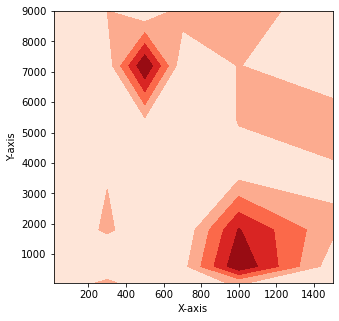

In [18]:
# Create Figure
# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.4,-0.2,0,0.2,0.4])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
#plt.xticks([0,0.5,1])
#plt.yticks([0,0.5,1])
ax.set_xlabel('X-axis')
_ = ax.set_ylabel('Y-axis')
#plt.savefig('figure.pdf') # uncomment to save vector/high-res version


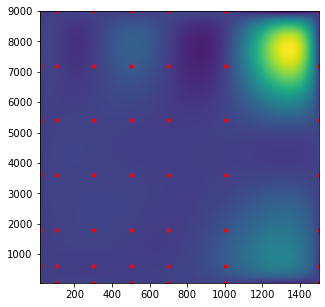

In [39]:
f = interp2d(X,Y,Z,kind="quintic")

x_coords = np.arange(min(X),max(X)+1)
y_coords = np.arange(min(Y),max(Y)+1)
Z_interp = f(x_coords,y_coords)

fig = plt.imshow(Z_interp,
           extent=[min(X),max(X),min(Y),max(Y)],
           origin="lower", aspect='auto')

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
plt.plot(X,Y,'.', color='red')

## Trying out family of curves

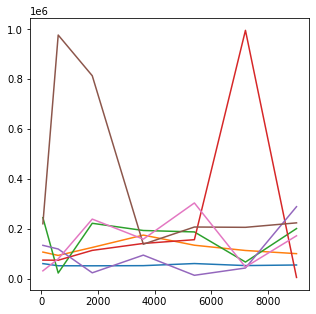

In [50]:
num_sources_unique = cpu_times.num_sources.unique()

for num_source in num_sources_unique:
    X = cpu_times[cpu_times['num_sources'] == num_source].avg_time
    Y = cpu_times[cpu_times['num_sources'] == num_source].comp_time

    plt.plot(X,Y)
    


In [52]:
max(comp_time)

995843

In [ ]:
""